In [17]:
# import relevant modules 
import os
import sys
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt

# locate directory containing scripts 
current_directory = os.getcwd() 
src_directory = os.path.dirname(current_directory) + '/src'
sys.path.append(src_directory)

# import custom modules
import spin_chain, blue_red_bonds, generate_VTA_list, VTA_numerics, VTA_analytics, simulate_algorithm
reload(spin_chain)
reload(blue_red_bonds)
reload(generate_VTA_list)
reload(VTA_numerics)
reload(VTA_analytics)
reload(simulate_algorithm); 

# $\text{Exact Simulations}$

$$\Large \hat{H}_4 = \sum_{j = 1}^{4} (X_j X_{j+1} + Y_i Y_{i+1} + \lambda Z_i Z_{i+1})$$

$$ 
\Large \text{GSP}_{\text{exact}}(\alpha, \lambda, E_0)  \equiv \prod_{j = 1}^{4} e^{\alpha(a^{\dagger}_j - a_j) \otimes (\hat{H}_4 - E_0)} 
$$

$$ 
\Large \text{GSP}(\alpha, \lambda, E_0) \equiv (\text{PERM} \ \mathcal{D}_{R} (\alpha, \lambda) \mathcal{D}_{B} (\alpha, \lambda))^{\frac{N}{2}} \mathcal{D}_{\text{shift}}(\alpha, E_0)
$$

$$ 
\Large \text{VTA}_{\text{exact}}(\alpha, \lambda, E_0) \equiv \langle 0000 | \text{GSP}_{\text{exact}}(\alpha, \lambda, E_0) | 0000 \rangle 
$$

$$ 
\Large \text{VTA}(\alpha, \lambda, E_0) \equiv  \langle 0000 | \text{GSP}(\alpha, \lambda, E_0) | 0000 \rangle 
$$

In [3]:
# specify parameters for spin chain (number of sites, coupling constants, 
# periodic or nonperiodic boundary conditions,  and tolerance 
# with which to determine orthonormality of eigenstates
N = 4
Jx = 1
Jy = 1
Jz = 1
periodic_bc = True
tolerance4 = 1e-12

# collect properties of spin chain
H4, H4_list, eigenstates4, eigenvalues4, E_0, ρ_ground_state4 = \
    spin_chain.properties(N, Jx, Jy, Jz, periodic_bc, tolerance4)

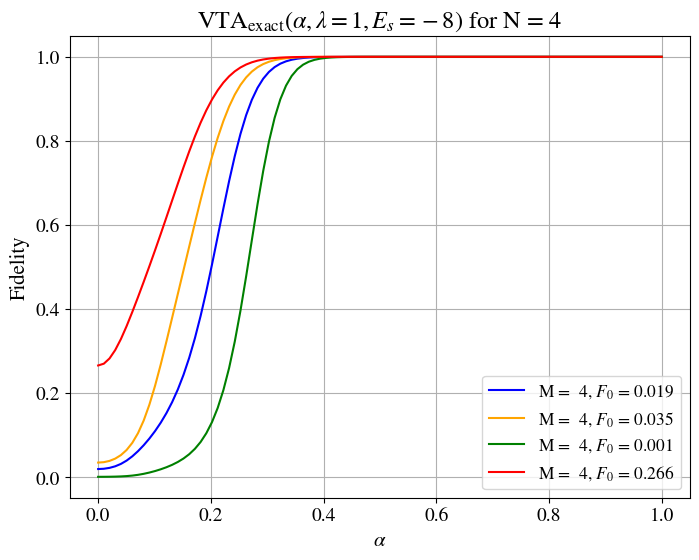

In [4]:
# define parameters for simulations
N_cavities = 4
N_qubits = 4
α_start = 0
α_end = 1
α_steps = 100
m_start = 4
m_stop = 4
E_0 = E_0
num_states = 4
tolerance = tolerance4
cutoff = 'N/A'
save_file = False

Ψ0_list, ψ0_list = simulate_algorithm.generate_initial_states(N_cavities, N_qubits, num_states, cutoff)
VTA_exact_fidelity_array = \
simulate_algorithm.plot_exact_fidelity(N_cavities, α_start, α_end, α_steps, E_0, m_start, m_stop, 
                                       N_qubits, Jx, Jy, Jz, periodic_bc, tolerance, ψ0_list, save_file)
plt.savefig('graph1')

In [5]:
Ψ0_list_save = Ψ0_list
ψ0_list_save = ψ0_list

# $\text{Recursive Application}$

In [48]:
Ψ0_list, ψ0_list = simulate_algorithm.generate_initial_states(N_cavities, N_qubits, num_states, cutoff)

In [61]:
α_start = 0
α_end = 1
α_steps = 101
Es = -13
# G_list = compute_G_list(α_start, α_end, α_steps, Es, eigvecs, ρ_list)

VTA_list = generate_VTA_list.SU2_automated(N, α_start, α_end, α_steps, \
                                           Jx, Jy, Jz, Es)

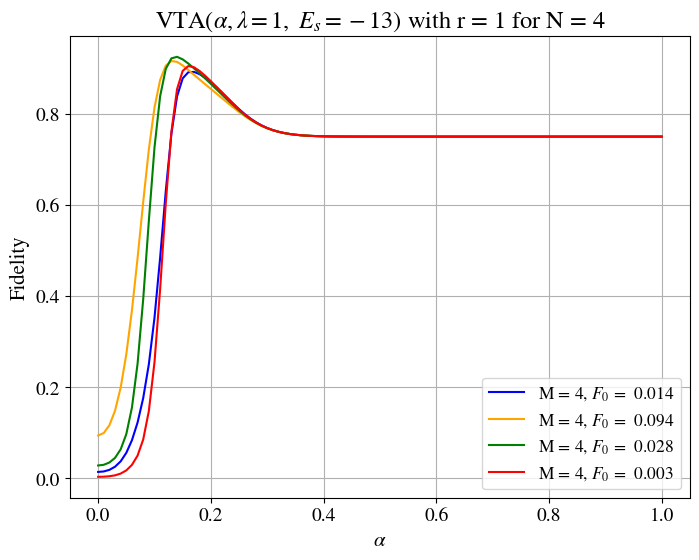

In [62]:
r = 1
asymptotes = False
return_fidelity_array = True
VTA_fidelity_array = simulate_algorithm.VTA_fidelity(
                 N, ψ0_list, VTA_list, ρ_ground_state4, α_start, α_end, α_steps, 
                 Jx, Jy, Jz, Es, r, m_start, m_stop, asymptotes, save_file, \
                 return_fidelity_array = return_fidelity_array)
plt.savefig('graph2')

In [296]:
α_array = np.linspace(α_start, α_end, α_steps)
arg = np.argmax(VTA_fidelity_array[0])
α_array[arg]

0.15460000000000002

In [297]:
arg = np.argmax(VTA_fidelity_array[1])
α_array[arg]

0.15460000000000002

In [298]:
arg = np.argmax(VTA_fidelity_array[2])
α_array[arg]

0.15460000000000002

In [299]:
arg = np.argmax(VTA_fidelity_array[3])
α_array[arg]

0.15460000000000002

In [235]:
l = np.argsort(VTA_fidelity_array[0])

In [236]:
l[::-1]

array([1546, 1545, 1547, ...,    2,    1,    0])

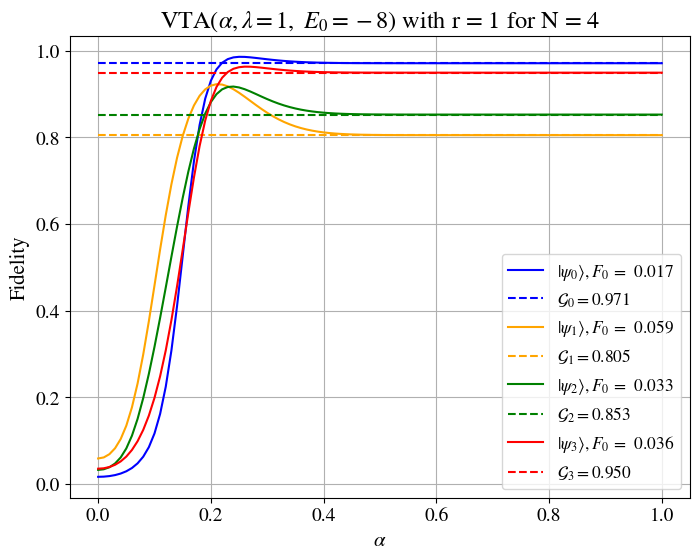

In [196]:
ρ_ground_stateN = ρ_ground_state4
r_start = 1
r_end = 1
r_steps = 1
asymptotes = True
save_file = False
return_fidelity_array = True

simulate_algorithm.plot_VTA_fidelity(ψ0_list, G_list, ρ_ground_stateN, \
                                     α_start, α_end, α_steps, Jx, Jy, Jz, E_0, \
                                     r_start, r_end, r_steps, m_start, m_stop, \
                                     asymptotes, save_file, return_fidelity_array = \
                                     return_fidelity_array)
plt.savefig('graph2')

# $\mathcal{G}(\alpha, E_s)$

In [176]:
# G(α, Es) basis functions
e0 = lambda α, Es: np.exp(-2*(α**2)*((Es + 12)**2)) 
e1 = lambda α, Es: np.exp(-2*(α**2)*((Es + 8)**2)) 
e2 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2)) 
e3 = lambda α, Es: np.exp(-2*(α**2)*(Es**2)) 
e4 = lambda α, Es: np.exp(-2*(α**2)*((Es - 4)**2))
e5 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 4))
e6 = lambda α, Es: np.exp(-2*(α**2)*((Es + 2)**2 + 20))
e7 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 8))
e8 = lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 16))
e9 = lambda α, Es: np.exp(-2*(α**2)*(Es**2 + 16))
e10= lambda α, Es: np.exp(-2*(α**2)*((Es + 4)**2 + 32))

# G(α, Es) coefficients
g00 = lambda α, Es: (3*e0(α, Es) + 24*e1(α, Es) \
                     + 6*e2(α, Es) - e4(α, Es))/32
g44 = lambda α, Es: -(e0(α, Es) - 6*e2(α, Es) \
                      - 24*e3(α, Es) - 3*e4(α, Es))/32
g04 = lambda α, Es: (np.sqrt(3)*(e0(α, Es) + 4*e1(α, Es) - \
                     10*e2(α, Es) + 4*e3(α, Es) + e4(α, Es)))/32
g40 = lambda α, Es: - g04(α, Es)
gt = lambda α, Es: (e10(α, Es) + e2(α, Es) + 4*e5(α, Es) - 4*e6(α, Es) + \
                    2*e8(α, Es))/4
gs = lambda α, Es: (e3(α, Es) + e5(α, Es) - e6(α, Es) + e9(α, Es))/2
gq = lambda α, Es: e4(α, Es)

P, eigvecs, ρ_list = spin_chain.symmetry_eigvecs(N, Jx, Jy, Jz, periodic_bc)

# compute G
def G(α, Es): 
    
    return g00(α, Es)*ρ_list[0] + \
           g04(α, Es)*eigvecs[0]*eigvecs[4].dag() + \
           g40(α, Es)*eigvecs[4]*eigvecs[0].dag() + \
           g44(α, Es)*ρ_list[4] + \
           gt(α, Es)*sum(ρ_list[1:4]) + \
           gs(α, Es)*sum(ρ_list[5:11]) + \
           gq(α, Es)*sum(ρ_list[11:16])

def compute_G_list(α_start, α_end, α_steps, Es, eigvecs, ρ_list):
    
    # construct array over which we will sweep α
    α_array = np.linspace(α_start, α_end, α_steps)
    
    # compute G_list
    G_list = [G(α, Es).tidyup() for α in α_array]
    
    return G_list

# $$ \text{VTA}(\alpha, \lambda, E_0)  $$

In [99]:
# specify parameters for VTA_exact
N_qubits = 4
Jx = 1 
Jy = 1
Jz = 1
periodic_bc = True
tolerance = 1e-9
α_start = 0 
α_end = 1
α_steps = 100
E_0 = -9

# compute list of VTA_exact
VTA_exact_list = VTA4_list.exact(N_qubits, Jx, Jy, Jz, \
                                 periodic_bc, tolerance, \
                                 α_start, α_end, α_steps, E_0)

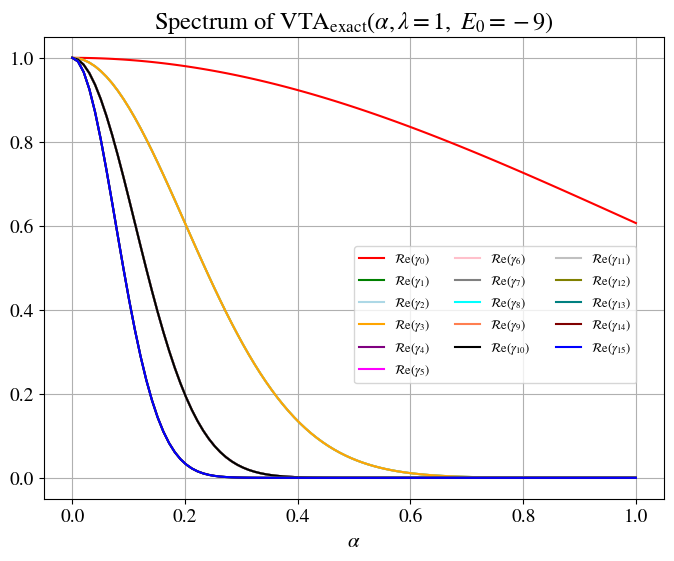

In [104]:
k_start = 0
k_end = 15
k_steps = 1
asymptotes = False
savefile = True
VTA_type = 'exact'
loc = (0.5, 0.25)
VTA_properties.spectrum(VTA_exact_list, Jx, Jy, Jz, \
                        α_start, α_end, α_steps, E_0, \
                        k_start, k_end, k_steps, \
                        tolerance, asymptotes, \
                        current_directory, savefile, \
                        VTA_type = VTA_type, 
                        loc = loc)

In [93]:
E_0_start = -2.9
E_0_end = -2.0
E_0_gradation = 0.1
E_0_list = np.arange(E_0_start, E_0_end + E_0_gradation, E_0_gradation)
E_0_list

array([-2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1, -2. ])

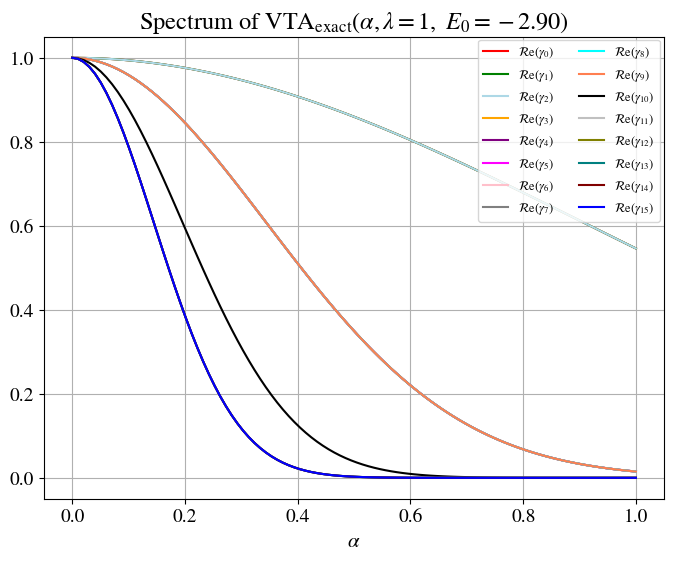

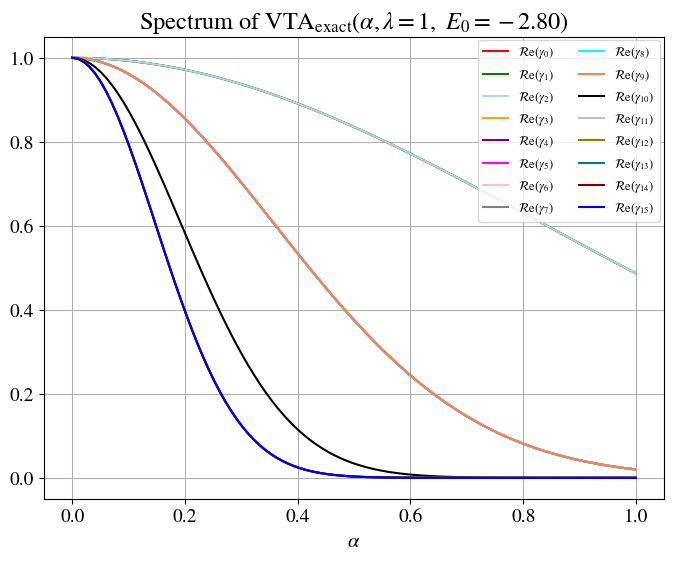

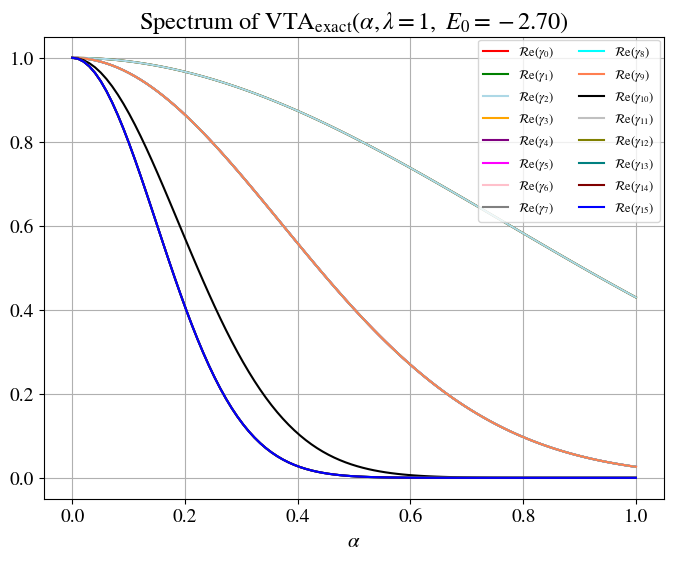

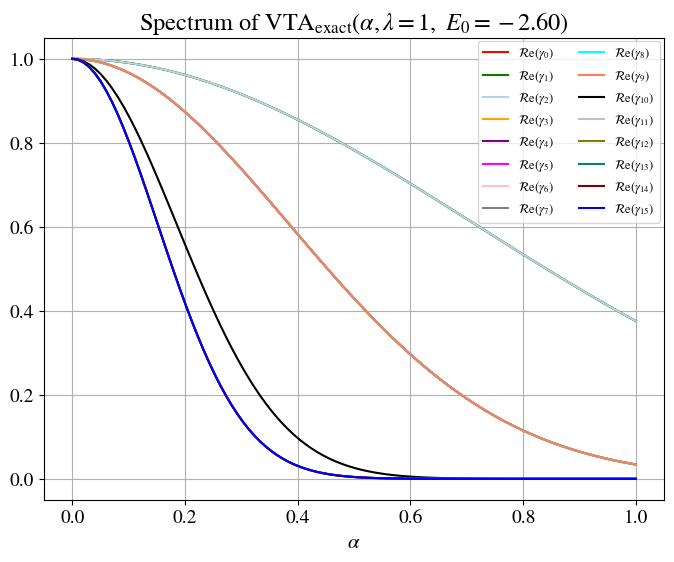

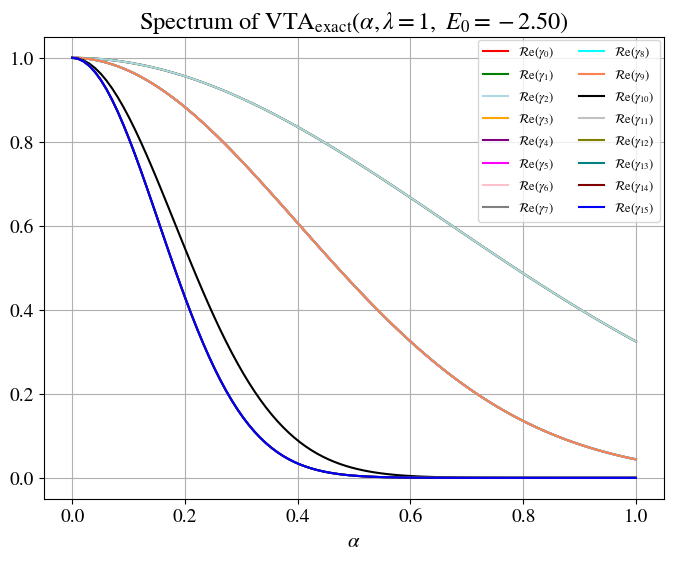

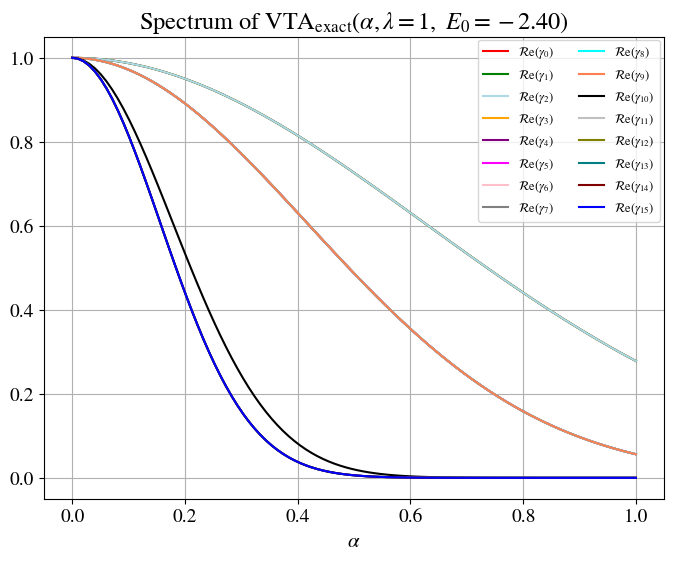

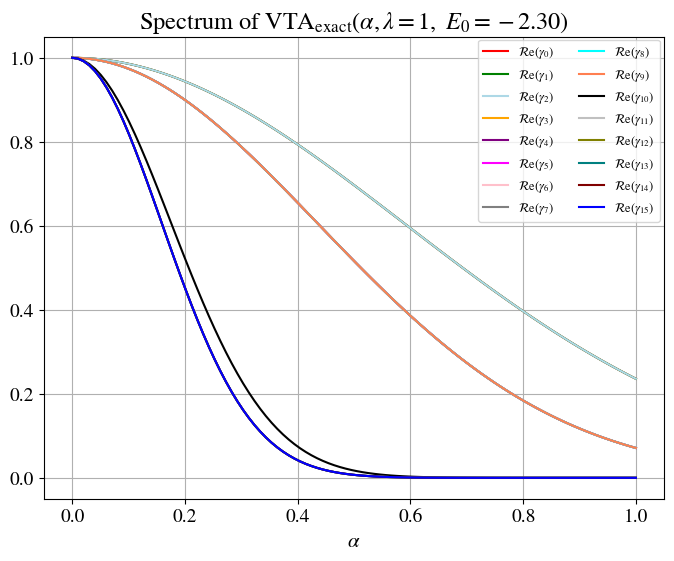

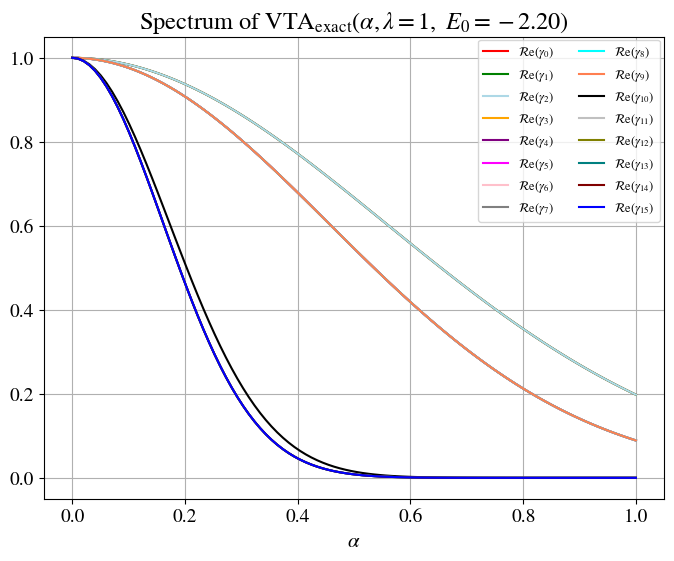

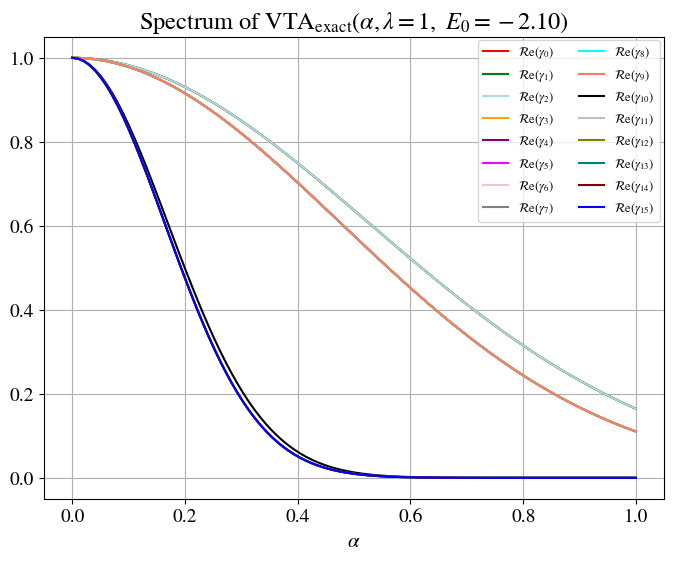

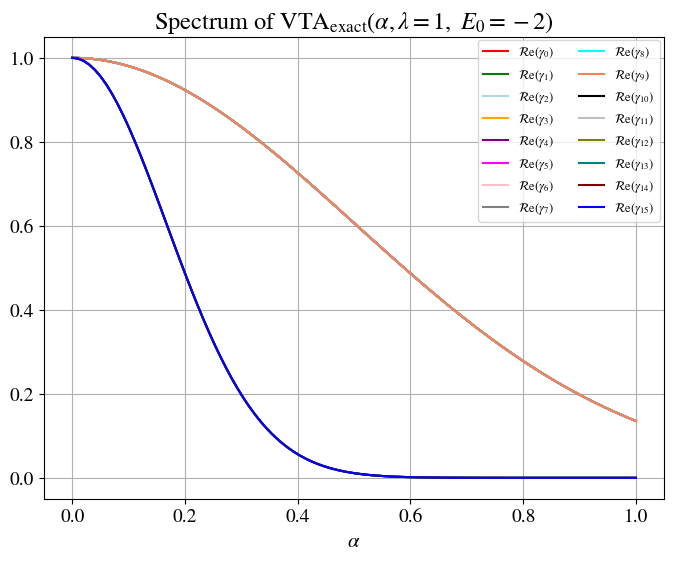

In [91]:
for E_0 in E_0_list:
    
    loc = (0.7, 0.6)
    
    # compute list of VTA_exact
    VTA_exact_list = VTA4_list.exact(N_qubits, Jx, Jy, Jz, \
                                     periodic_bc, tolerance, \
                                     α_start, α_end, α_steps, E_0)

    VTA_properties.spectrum(VTA_exact_list, Jx, Jy, Jz, \
                            α_start, α_end, α_steps, E_0, \
                            k_start, k_end, k_steps, \
                            tolerance, asymptotes, \
                            current_directory, savefile, \
                            VTA_type = VTA_type, 
                            loc = loc)

In [ ]:
E_0 = -8
VTA_list = VTA4_list.SU2_automated(N, α_start, α_end, α_steps, Jx, Jy, Jz, E_0)

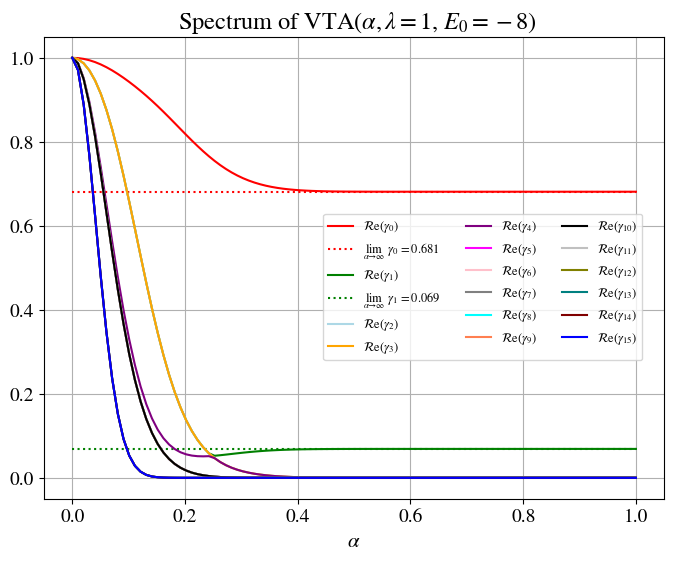

In [109]:
asymptotes = True
k_start = 0
k_end = 15
k_steps = 1
loc = (0.45, 0.3)
VTA_properties.spectrum(VTA_list, Jx, Jy, Jz, \
                        α_start, α_end, α_steps, E_0, \
                        k_start, k_end, k_steps, \
                        tolerance, asymptotes, \
                        current_directory, savefile, \
                        loc = loc)

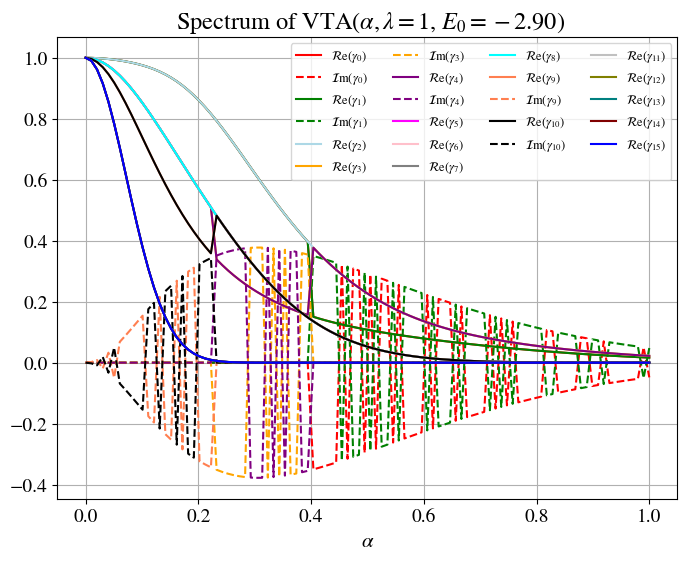

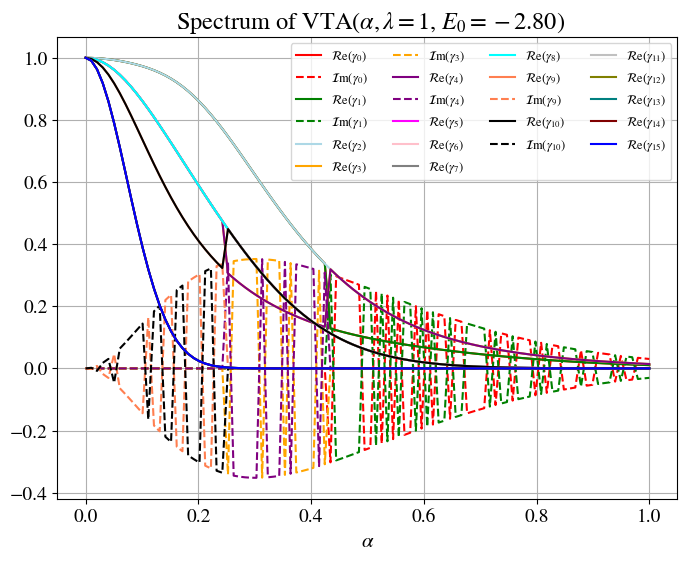

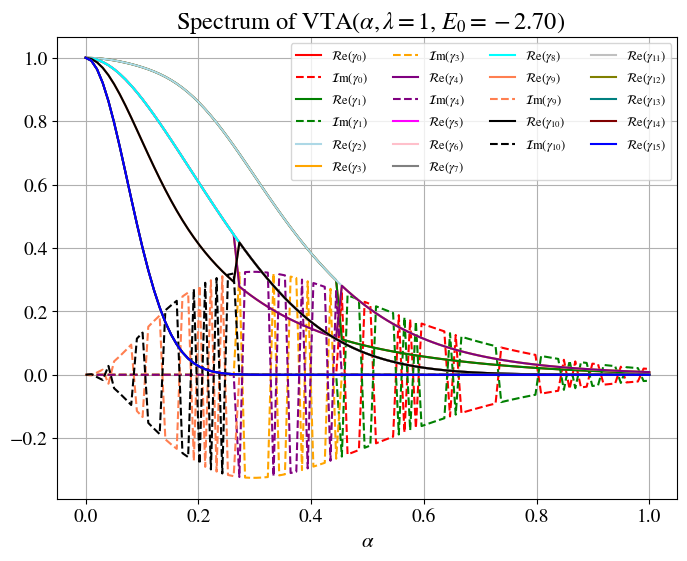

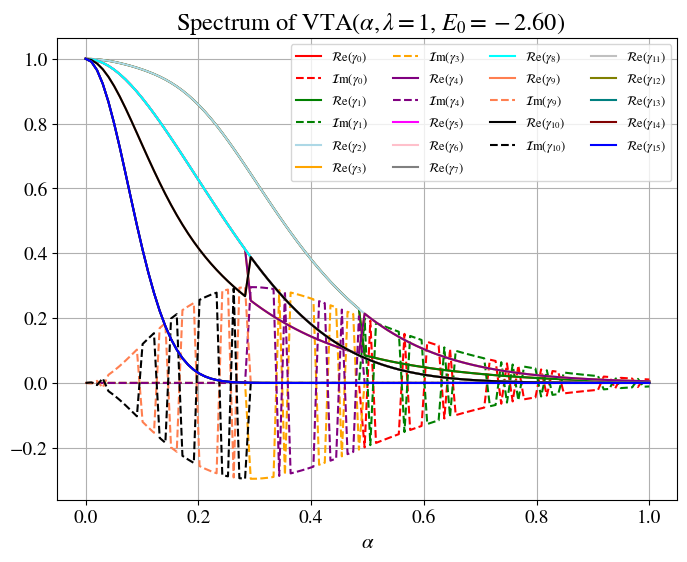

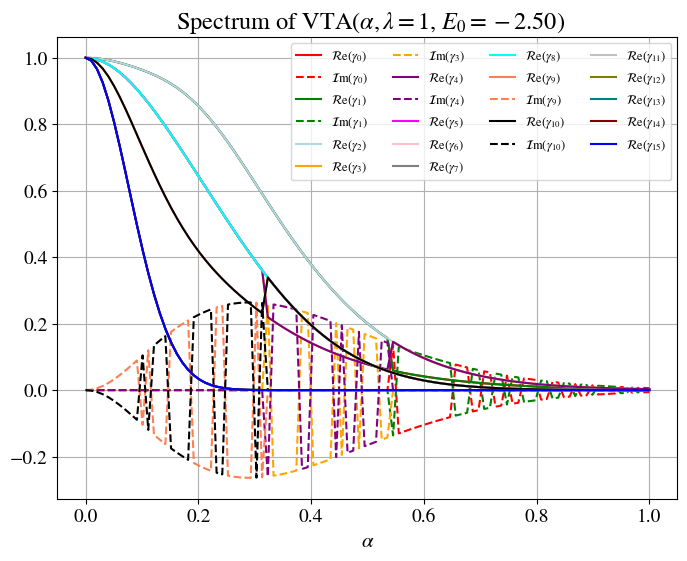

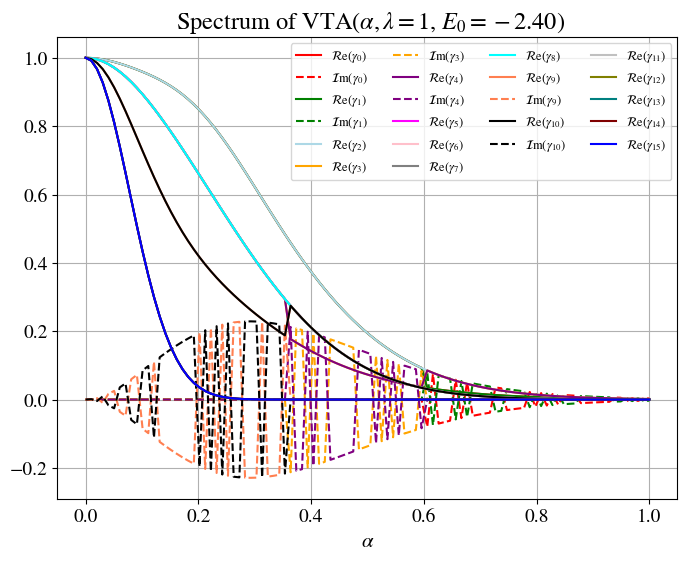

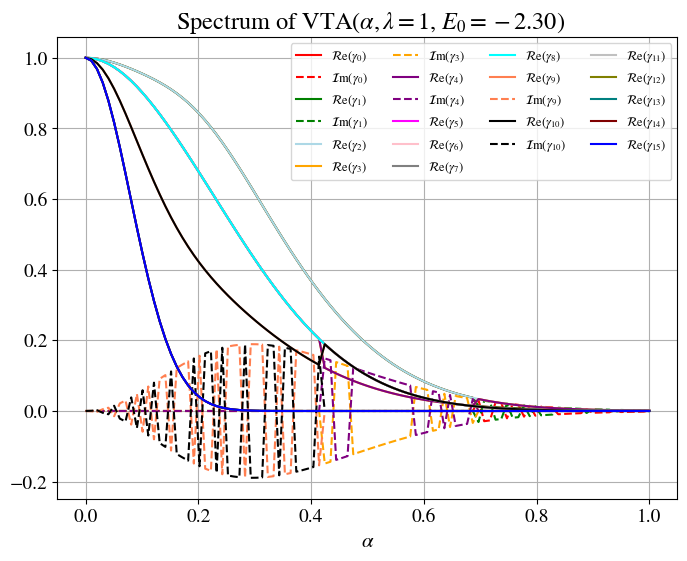

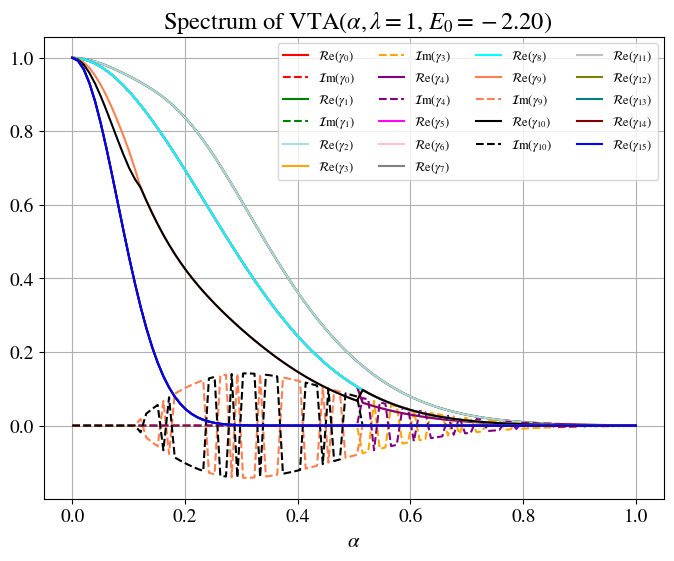

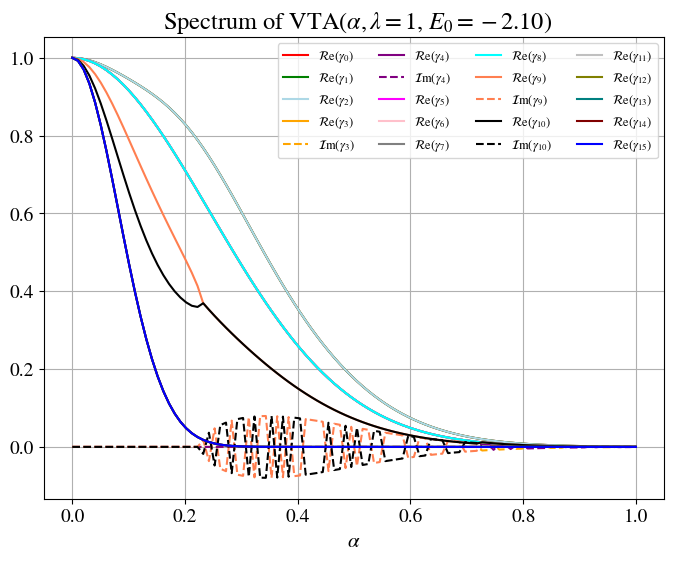

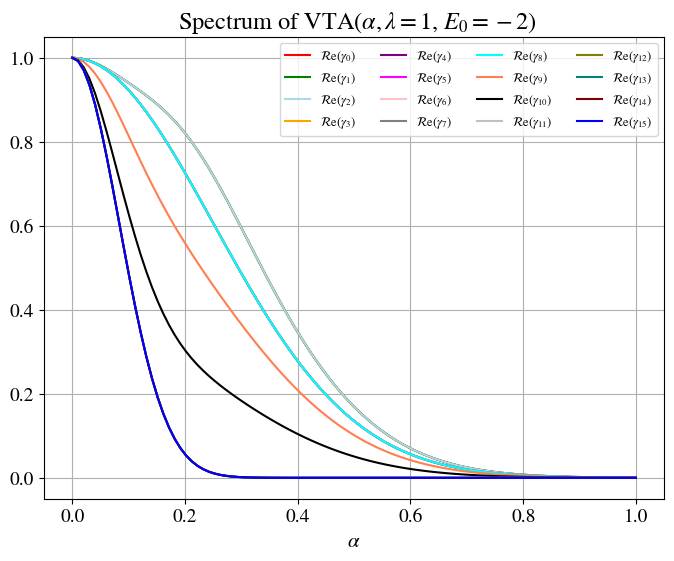

In [94]:
asymptotes = False
for E_0 in E_0_list:
    
    VTA_list = VTA4_list.SU2_automated(N, α_start, α_end, α_steps, Jx, Jy, Jz, E_0)
    
    VTA_properties.spectrum(VTA_list, Jx, Jy, Jz, \
                        α_start, α_end, α_steps, E_0, \
                        k_start, k_end, k_steps, \
                        tolerance, asymptotes, \
                        current_directory, savefile)

# $$ \text{Log(VTA}(\alpha, \lambda, E_0))$$

In [1]:
# specify parameters for VTA_exact
N_qubits = 4
Jx = 1 
Jy = 1
Jz = 1
periodic_bc = True
tolerance = 1e-9
α_start = 0 
α_end = 1
α_steps = 100
E_0 = -8

# compute list of VTA_exact
VTA_exact_list = VTA4_list.exact(N_qubits, Jx, Jy, Jz, \
                                 periodic_bc, tolerance, \
                                 α_start, α_end, α_steps, E_0)

# compute list of effective Hamiltonians
H_eff_list_exact = [np.round(logm(VTA), 12) for VTA in VTA_exact_list]

# verify that you can re-exponentiate effective Hamiltonians to recover original GSP 
all([np.allclose(expm(H_eff), VTA, rtol = rtol, atol = atol) \
                 for H_eff, VTA in zip(H_eff_list_exact, VTA_exact_list)])

NameError: name 'VTA4_list' is not defined

In [696]:
E_0_start = -8
E_0_end = -8
E_0_gradation = 1
E_0_list = np.arange(E_0_start, E_0_end + E_0_gradation, E_0_gradation)
E_0_list

array([-8])

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/lukebell/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/v_/8yc2g_ts48vb0b49qvr1kc6r0000gn/T/ipykernel_73684/3188851193.py", line 22, in <module>
    VTA_properties.spectrum(H_eff_list_exact, Jx, Jy, Jz, \
  File "/Users/lukebell/Documents/boson_gang/src/VTA_properties.py", line 131, in spectrum
    plt.savefig(filename)
  File "/Users/lukebell/anaconda3/lib/python3.11/site-packages/matplotlib/pyplot.py", line 1023, in savefig
    res = fig.savefig(*args, **kwargs)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/lukebell/anaconda3/lib/python3.11/site-packages/matplotlib/figure.py", line 3378, in savefig
    self.canvas.print_figure(fname, **kwargs)
  File "/Users/lukebell/anaconda3/lib/python3.11/site-packages/matplotlib/backend_bases.py", line 2366, in print_figure
    result = print_method(
             ^^^

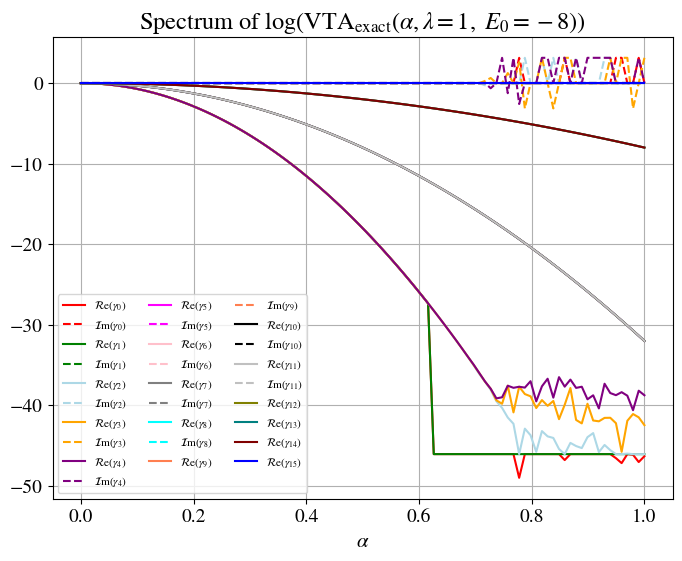

In [697]:
log_bool = True
loc = 'lower left'
VTA_type = 'exact'
fontsize = 8
ncol = 3
savefile = True

for E_0 in E_0_list:

    # compute list of VTA_exact
    VTA_exact_list = VTA4_list.exact(N_qubits, Jx, Jy, Jz, \
                                     periodic_bc, tolerance, \
                                     α_start, α_end, α_steps, E_0)

    # compute list of effective Hamiltonians
    H_eff_list_exact = [np.round(logm(VTA), 12) for VTA in VTA_exact_list]

    # verify that you can re-exponentiate effective Hamiltonians to recover original GSP 
    verify_log_bool = all([np.allclose(expm(H_eff), VTA, rtol = rtol, atol = atol) \
                         for H_eff, VTA in zip(H_eff_list_exact, VTA_exact_list)])
    
    VTA_properties.spectrum(H_eff_list_exact, Jx, Jy, Jz, \
                            α_start, α_end, α_steps, E_0, \
                            k_start, k_end, k_steps, \
                            tolerance, asymptotes, \
                            current_directory, \
                            loc = loc, \
                            VTA_type = VTA_type, \
                            log = log_bool, fontsize = fontsize, ncol = ncol, \
                            savefile = savefile)
    
    if not verify_log_bool:
        print('Unable to accurately compute logarithm')

In [667]:
# compute VTA_list
E_0 = -12
VTA_list = VTA4_list.SU2_automated(N_qubits, α_start, α_end, α_steps, Jx, Jy, Jz, E_0)

# compute list of effective Hamiltonians
H_eff_list = [logm(VTA) for VTA in VTA_list]

# verify that you can re-exponentiate effective Hamiltonians to recover original GSP 
all([np.allclose(expm(H_eff), VTA, rtol = rtol, atol = atol) \
                 for H_eff, VTA in zip(H_eff_list, VTA_list)])

logm result may be inaccurate, approximate err = 1676.1455926348792
logm result may be inaccurate, approximate err = 6.448467134656459e-12
logm result may be inaccurate, approximate err = 0.9263744221633375


False

In [684]:
E_0_start = 5
E_0_end = 10
E_0_gradation = 1
E_0_list = np.arange(E_0_start, E_0_end + E_0_gradation, E_0_gradation)
E_0_list

array([ 5,  6,  7,  8,  9, 10])

logm result may be inaccurate, approximate err = 8.966484538289663e-12
logm result may be inaccurate, approximate err = 9.027810710885652e-13
logm result may be inaccurate, approximate err = 5.675449833620656e-13
logm result may be inaccurate, approximate err = 3.5796635724995817e-13
logm result may be inaccurate, approximate err = 2.301470055747702e-13
logm result may be inaccurate, approximate err = 3.2690638256727917e-13
logm result may be inaccurate, approximate err = 3.114529584994802e-13
logm result may be inaccurate, approximate err = 2.5898774306646003e-13
logm result may be inaccurate, approximate err = 3.648758529538969e-13
logm result may be inaccurate, approximate err = 2.695452260436627e-13
logm result may be inaccurate, approximate err = 3.075308940171131e-13
logm result may be inaccurate, approximate err = 8.676366731352319e-13
logm result may be inaccurate, approximate err = 6.707445095531619e-13
logm result may be inaccurate, approximate err = 1.4485685683040597e-12
lo

ZeroDivisionError: float division by zero

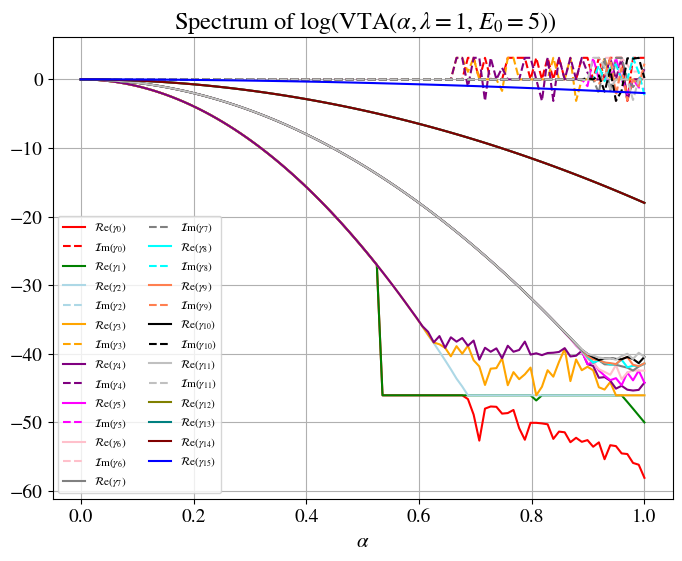

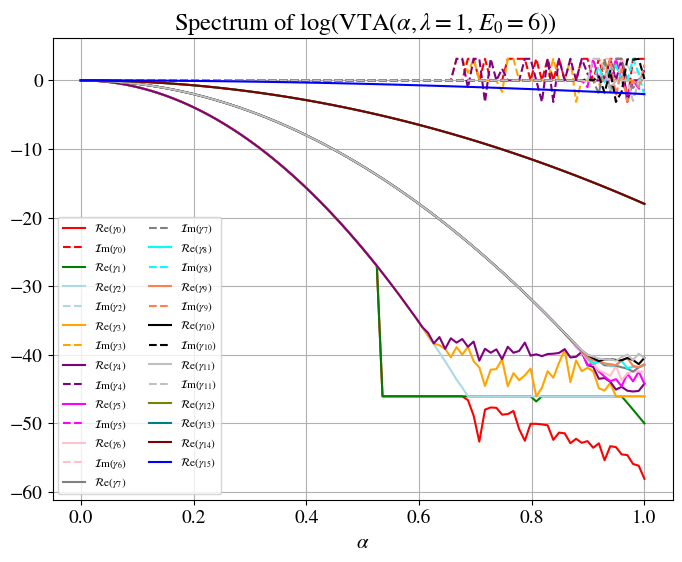

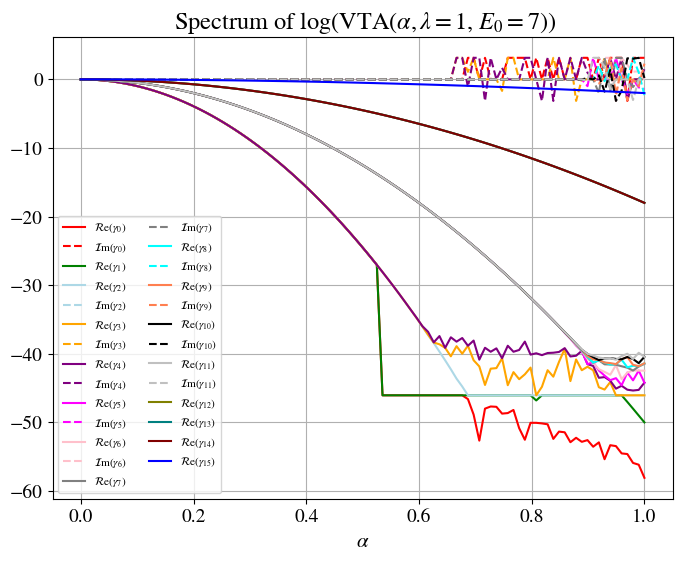

In [685]:
log_bool = True
fontsize = 8
ncol = 2
loc = 'lower left'
VTA_type = 'approximate'
savefile = True

for E_0 in E_0_list:

    # compute list of VTA_exact
    VTA_list = VTA4_list.SU2_automated(N_qubits, α_start, α_end, α_steps, Jx, Jy, Jz, E_0)

    # compute list of effective Hamiltonians
    H_eff_list = [logm(VTA) for VTA in VTA_list]

    # verify that you can re-exponentiate effective Hamiltonians to recover original GSP 
    verify_log_bool = all([np.allclose(expm(H_eff), VTA, rtol = rtol, atol = atol) \
                         for H_eff, VTA in zip(H_eff_list, VTA_list)])
    
    VTA_properties.spectrum(H_eff_list_exact, Jx, Jy, Jz, \
                            α_start, α_end, α_steps, E_0, \
                            k_start, k_end, k_steps, \
                            tolerance, asymptotes, \
                            current_directory, \
                            loc = loc, \
                            VTA_type = VTA_type, \
                            log = log_bool, fontsize = fontsize, ncol = ncol, \
                            savefile = savefile)
    
    if not verify_log_bool:
        print('Unable to accurately compute logarithm')

# $ \text{Expansion of GSP} $

In [193]:
from qutip import destroy, identity, tensor, qeye

In [231]:
# define cutoff
cutoff = 3

# define operators for bosonic modes 
a = destroy(cutoff)
I = qeye([2]*4)

# define local Hamiltonians
A = H12 = H4_list[0]
B = H23 = H4_list[1]
C = H34 = H4_list[2]
D = H41 = H4_list[3]

# define operators in argument of matrix exponentials 
α = 0.1
α_arg = α*a.dag() - np.conj(α)*a

# define exact displacement 
D_exact = lambda α: tensor(α*a.dag() - np.conj(α)*a, A + B + C + D).expm()

# define Trotterized displacement
D_A = lambda α: tensor(α*a.dag() - np.conj(α)*a, A).expm()
D_B = lambda α: tensor(α*a.dag() - np.conj(α)*a, B).expm()
D_C = lambda α: tensor(α*a.dag() - np.conj(α)*a, C).expm()
D_D = lambda α: tensor(α*a.dag() - np.conj(α)*a, D).expm()
D_trotter = lambda α: D_D(α)*D_B(α)*D_C(α)*D_A(α)

In [248]:
# define 0th, 1st, and 2nd order displacements 
p = 1

# 0th order contributions
D_A0 = I 
D_B0 = I 
D_C0 = I 
D_D0 = I 

# 1st order contributions
D_A1 = lambda α: -2*1j*α*p*A
D_B1 = lambda α: -2*1j*α*p*B
D_C1 = lambda α: -2*1j*α*p*C
D_D1 = lambda α: -2*1j*α*p*D

# 2nd order contributions
D_A2 = lambda α: -4*(α**2)*(p**2)*(A**2)
D_B2 = lambda α: -4*(α**2)*(p**2)*(B**2)
D_C2 = lambda α: -4*(α**2)*(p**2)*(C**2)
D_D2 = lambda α: -4*(α**2)*(p**2)*(D**2)

In [254]:
# 0th order approximation to VTA integrand
VTA_0 = (D_A0)*(D_B0)*(D_C0)*(D_D0) 
display(VTA_0 == I) 

# 1st order approximation to VTA integrand
VTA_1 = lambda α: (D_A0 + D_A1(α)) * (D_B0 + D_B1(α)) * \
                  (D_C0 + D_C1(α)) * (D_D0 + D_D1(α))

# 2nd order approximation to VTA integrand 
VTA_2 = lambda α: (D_A0 + D_A1(α) + D_A2(α)) * (D_B0 + D_B1(α) + D_B2(α)) * \
                  (D_C0 + D_C1(α) + D_C2(α)) * (D_D0 + D_D1(α) + D_D2(α))

True

In [257]:
D_exact(α).eigenenergies()

array([0.18409956-9.82907602e-01j, 0.18409956+9.82907602e-01j,
       0.76944771+6.38709811e-01j, 0.76944771-6.38709811e-01j,
       0.76944771+6.38709811e-01j, 0.76944771+6.38709811e-01j,
       0.76944771+6.38709811e-01j, 0.76944771-6.38709811e-01j,
       0.76944771-6.38709811e-01j, 0.76944771-6.38709811e-01j,
       0.76944771-6.38709811e-01j, 0.76944771+6.38709811e-01j,
       0.76944771+6.38709811e-01j, 0.76944771+6.38709811e-01j,
       0.76944771-6.38709811e-01j, 0.76944771-6.38709811e-01j,
       0.76944771-6.38709811e-01j, 0.76944771+6.38709811e-01j,
       1.        +0.00000000e+00j, 1.        +0.00000000e+00j,
       1.        +0.00000000e+00j, 1.        +0.00000000e+00j,
       1.        +0.00000000e+00j, 1.        +0.00000000e+00j,
       1.        +0.00000000e+00j, 1.        +0.00000000e+00j,
       1.        +0.00000000e+00j, 1.        +0.00000000e+00j,
       1.        +0.00000000e+00j, 1.        +0.00000000e+00j,
       1.        +0.00000000e+00j, 1.        +0.0000000

In [259]:
VTA_1(α).eigenenergies()

array([0.25324673+1.58628538j, 0.7616    -0.768j     ,
       0.7616    -0.768j     , 0.7616    -0.768j     ,
       0.7616    -0.768j     , 0.7616    -0.768j     ,
       1.10416928+0.82551477j, 1.10416928+0.82551477j,
       1.10416928+0.82551477j, 1.17639306-0.19202998j,
       1.17639306-0.19202998j, 1.17639306-0.19202998j,
       1.24435327-0.05028538j, 1.30983767+0.13451522j,
       1.30983767+0.13451522j, 1.30983767+0.13451522j])

In [260]:
from scipy.integrate import quad

# Define the function to integrate
def f(x):
    return np.exp(-x**2)

# Perform the integration from -infinity to infinity
result, _ = quad(f, -np.inf, np.inf)
print(result)


1.7724538509055159


# $\text{Miscellany}$

In [ ]:
def clean_eigvals(O, tolerance, decimals): 
    
    'returns the k smallest eigenvalues of operator O'

    # find eigenergies of operator O 
    real_list, complex_list = sort_eigvals(O, tolerance) 

    # collect the k largest effectively real eigenvalues
    k_smallest_eigvals = sorted(real_list)[:k]

    for eigval in eigvals:

        # Append eigenvalue to real_list if 
        # it is effectively real 
        if abs(eigval.imag) < tolerance:
            real_list.append(eigval.real)
        else:
        # Append the eigenvalue to complex_list if 
        # it is complex
            complex_list.append(eigval) 
        
    # returned clean list if it has the same 
    # length as eigvals
    if len(real_list) == len(eigvals):
        
        # round real_list to number of decimal places
        # specified by argument
        rounded_list = np.around(real_list, decimals = decimals)
        return rounded_list
    
    else: 
        print('There is at least one eigenvalue whose ' \
              + 'imaginary part is nonnegligible')

In [ ]:
H_eff = Qobj(sqrtm((-2/(α**2))*(logm(VTA)))) + E_0*qeye(16)
eigenvalues4_eff, eigenstates4_eff = H_eff.eigenstates()
ρ_ground_state4_eff = Qobj(eigenstates4_eff[0]*eigenstates4_eff[0].dag(), \
                           dims = [[2]*4, [2]*4])
E_0_eff = min(eigenvalues4_eff)
fidelity(eigenstates4_eff[0], eigenstates4[0])

In [ ]:
eigval_multiplicies = np.unique(np.around(eigvals, decimals = 12), \
                                return_counts = True)[1]
np.any(eigval_multiplicies > 1)

In [ ]:
def largest_eigvals(O, k_start, k_end, k_steps):

    'returns the k largest eigenvalues of operator O'

    # find eigenergies of operator O 
    real_list, imaginary_list = sort_eigvals(O) 

    # collect the k largest effectively real eigenvalues
    k_largest_eigvals = sorted(real_list, reverse = True)[k_start:k_end + 1: k_steps]

    if complex_list == []: 
        return k_largest_eigvals
    else: 

        # verify that each of the largest eigenvalues is greater 
        # than the modulus of all other complex eigenvalues; 
        # this is to ensure that the modulus of any complex eigenvalue
        # does not count as a one of the largest eigenvalues
        comparison_results = [[x > abs(z) for z in imaginary_list] \
                              for x in k_largest_eigvals]

        if all(comparison_results): 
            return k_largest_eigvals
        else: 
            print('Some eigenvalue has an imaginary part greater ' \
                  + f'than {tolerance} and a modulus greater than '
                  + 'one of the largest effectively real eigenvalues')

In [ ]:
def sort_eigvals(O): 
    
    '''
    sorts and stores the effectively real and  complex
    eigenvalues into lists 'real_list' and 'im_list'
    '''
    
    # find eigenenergies of operator 
    eigval_list = O.eigenenergies()
    
    # sort eigenvalues
    real_list = [eigval.real for eigval in eigvals]
    imaginary_list = [eigval.imag for eigval in eigvals]

    return eigval_list, real_list, imaginary_list

In [ ]:
# collect properties of our spin chain (total Hamiltonian, list of local )
H4, H4_list, eigenstates4, eigenvalues4, E_0, ρ_ground_state4 = \
    spin_chain.properties(N, Jx, Jy, Jz, periodic_bc, tolerance4)

# verify that eigenstates for H4 form an orthonormal basis
spin_chain.orthonormal_eigenstates(eigenstates4, tolerance4)

# verify eigendecomposition can reconstruct list of local Hamiltonians for N = 4
blue_spectra4, blue_mps4, red_spectra4, red_mps4 = blue_red_bonds.eigendecompose_spin_operators(N, Jx, Jy, Jz)
blue_red_bonds.reconstruct_spin_operators(H4_list, blue_spectra4, blue_mps4, red_spectra4, red_mps4)